# Исследование объявлений о продаже квартир

**Описание проекта:**

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:**

   1. Определить рыночную стоимость объектов недвижимости.
   2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.
   3. Установить, какие факторы влияют на ценообразование стоимости квартир.
   
**Ход исследования:**
     
Данные о недвижимости я получу из файла ```'/datasets/real_estate_data.csv'```. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.

На этапе ознакомления с данными мне необходимо убедиться в качестве полученных данных. На этапе предобработки я очищу данные от дубликатов, аномалий и пропусков. Затем, я изменю типы столбцов, чтобы они соответствовали значениям внутри столбцов.

После обработки данных я посчитаю показатели, необходимые для исследовательского анализа данных. Добавлю их в новые столбцы датафрейма.

На этапе проведения исследовательского анализа данных мне необходимо:

1. Изучить параметры объектов недвижимости
2. Изучить, как быстро продавались квартиры
3. Выяснить, какие факторы влияют на общую стоимость объекта
4. Определить среднюю цену квадратного метра в десяти населенных пунктах
5. Выявить зависимость стоимости квартиры от расстояния до центра города

В конце проекта мне необходимо сформулировать общий вывод по всей проделанной работе и дать рекомендации бизнесу.

Таким образом, моё исследование пройдет в 5 этапов:

- Изучение исходных данных
- Предобработка данных
- Подсчет необходимых показателей с занесением их в датафрейм
- Проведение исследовательского анализа данных
- Написание общего вывода

### Откройте файл с данными и изучите общую информацию. 

***1.1 Импорт библиотеки pandas + создание датафрейма с данными из файла:***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)

***1.2 Изучение полученной из датасета информации:***

In [ ]:
data.head(10) # Вывод первых десяти строк датафрейма

In [ ]:
data.info() # Получение общей информации о датафрейме

In [ ]:
data.describe() # Получение дополнительных данных

***1.3 Построение гистограмм для всех числовых столбцов датафрейма:***

In [ ]:
data.hist(figsize=(15, 20)) 
plt.show()

**Вывод:** В данных есть много пропусков и аномалий, которые необходимо обработать перед проведением исследования рынка недвижимости.

### Предобработка данных

***2.1 Изучение и обработка пропущенных значений:***

In [ ]:
data.isna().sum() # Поиск пропущенных значений в столбцах

In [ ]:
data['balcony'] = data['balcony'].fillna(0) # Пропуск может означать, что балкона нет

data['parks_around3000'] = data['parks_around3000'].fillna(0) # Пропуск может означать, что рядом парков нет

data['ponds_around3000'] = data['ponds_around3000'].fillna(0) # Пропуск может означать, что рядом водоёмов нет

data['locality_name'] = data['locality_name'].fillna('Без названия') # Можем заменить, так как таких пропусков всего 0,002% от общего количества

data['is_apartment'] = data['is_apartment'].fillna(False) # Пропуск может значить, что продавец не указал информацию, чтобы не потерять интерес со стороны покупателей

data['days_exposition'] = data['days_exposition'].fillna(0) # Пропуск может означать, что объявление до сих пор еще не сняли

In [ ]:
# Заполним пропуски средним значением, так как у одного населенного пункта расстояние до ближайшего аэропорта будет близким к среднему значению
for i in data['locality_name'].unique():
    data.loc[(data['locality_name'] == i) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
        data.loc[(data['locality_name'] == i), 'airports_nearest'].median() 

# Заполним пропуски средним значением, сгрупировав по населенному пункту
for i in data['locality_name'].unique():
    data.loc[(data['locality_name'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[(data['locality_name'] == i), 'ceiling_height'].median() 

# Заполним попуски средним значением в столбце 'cityCenters_nearest', сгруппировав по населенному пункту
for i in data['locality_name'].unique():
    data.loc[(data['locality_name'] == i) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
        data.loc[(data['locality_name'] == i), 'cityCenters_nearest'].median() 

# Проверим, заменились ли пропуски
data.isna().sum()

Чтобы заполнить столбец ```kitchen_area``` значениями, нужно определить, есть ли зависимость между кухней и общей площадью квартиры. Для этого вычислим коэффициент корреляции Пирсона:

In [ ]:
data['kitchen_area'].corr(data['total_area'])

Зависимость между ```kitchen_area``` и ```total_area``` есть, но она не прямая. Заполним пропуски пропорционально общей площади квартиры:

In [ ]:
for j in data['total_area'].unique():
    data.loc[(data['total_area'] == i) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
        data.loc[(data['total_area'] == i), 'kitchen_area'].median() 

# Оставшиеся пропуски можем заменить медианой
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

data.isna().sum() # Проверяем замену

Заполним пропуски в столбце ```living_area```. Для этого посчитаем коэффициент корреляции Пирсона для данных о количестве комнат и общей площади квартиры.

In [ ]:
data['living_area'].corr(data['rooms'])

Мы выяснили, что чем больше комнат, тем больше площадь квартиры (коэффициент близок к единице). Заполним медианой пропуски в столбце ```living_area```, сгруппировав по количеству комнат.

In [ ]:
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
        data.loc[(data['rooms'] == i), 'living_area'].median()

data.isna().sum() # Проверим пропуски

Причины появления пропусков в данных:

    1. Пользователь не указал данные (для пользовательских)
    2. Технический сбой (для картографических)

***2.2 Поиск столбцов, в которых необходимо изменить тип данных:***

In [ ]:
data.dtypes # Получаем информацию о всех типах столбцов датафрейма

В столбце ```'first_day_exposition'``` необходимо изменить тип данных, который используется для даты и времени (datetime64[ns]).

В столбцах ```'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition'``` необходимо заменить тип данных на int, так как значения могут быть только целочисленными.

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

categories = ['balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition', 'last_price']
for i in categories:
    data[i] = data[i].astype('int')

data.info() # Проверяем результат замены

**2.3 Поиск явных дубликатов в датафрейме:**

In [ ]:
data.duplicated().sum()

Явных дубликатов в датафрейме не обнаружено.

***2.4 Поиск неявных дубликатов и аномалий в датафрейме:***

In [ ]:
data['locality_name'].unique() # Находим все уникальные значения в столбце 'locality_name'

Замена неявных дубликатов в столбце ```'locality_name'```:

In [ ]:
duplicated_name = ['поселок городского типа', 'поселок', 'городской поселок', 'коттеджный поселок', 'коттеджный посёлок', 'городской посёлок', 'посёлок городского типа'] # неявные дубликаты
correct_name = 'посёлок' # Универсальное обозначение
for duplicate in duplicated_name:
    data['locality_name'] = data['locality_name'].str.replace(duplicate, correct_name)

In [ ]:
# обработать неявные дубликаты (пример: посёлок Мурино и Мурино, деревня Кудрово и Кудрово)
for i in data['locality_name'].unique():
    if 'посёлок ' in i:
        data['locality_name'] = data['locality_name'].str.replace('посёлок ', '')

for i in data['locality_name'].unique():
    if 'деревня ' in i:
        data['locality_name'] = data['locality_name'].str.replace('деревня ', '')

***2.5 Устранение аномалий в данных:***

In [ ]:
data.describe() # Вывод общей информации по всем столбцам датафрейма

**Обработка редких значений в столбце ```ceiling_height```**:

In [ ]:
data['ceiling_height'].describe()

Все значения, большие 20, необходимо поделить на 10, чтобы они были более реалистичны. Построим диаграмму размаха, чтобы оценить реалистичность значений.

In [ ]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 20, data['ceiling_height']/10)
data.boxplot(column='ceiling_height') # Проверяем значения с помощью диаграммы размаха
plt.show()

Высота потолков более 4 метров выглядит нереалистичной, поэтому избавимся от всех аномальных значений. Установим нижнюю планку для высоты потолков, возьмем значение 2.4 метра (нижний "ус"), чтобы избавиться от выбросов.

In [ ]:
print(len(data['ceiling_height'])) # Количество значений до фильтрации
data = data[(data['ceiling_height'] <= 4) & (data['ceiling_height'] >= 2.4)]
print(len(data['ceiling_height'])) # Количество значений после фильтрации
data.boxplot(column='ceiling_height')
plt.show()

**Обработка редких значений в столбце ```last_price```**:

In [ ]:
data.boxplot(column='last_price')
print(data['last_price'].describe())
plt.show()
print(len(data['last_price'])) # Количество значений до фильтрации
data = data[(data['last_price'] <= 10**8) & (data['last_price'] >= 20000)]
print(len(data['last_price'])) # Количество значений после фильтрации
data.boxplot(column='last_price')
plt.show()

**Обработка редких значений в столбце ```total_area```**:

In [ ]:
data.boxplot(column='total_area')
plt.show()
print(len(data['total_area'])) # Количество значений до фильтрации
data = data[(data['total_area'] <= 200)]
print(len(data['total_area'])) # Количество значений после фильтрации
data.boxplot(column='total_area')
plt.show()

**Обработка редких значений в столбце ```rooms```**:

In [ ]:
data.boxplot(column='rooms')
plt.show()
print(len(data['rooms'])) # Количество значений до фильтрации
data = data[(data['rooms'] >= 1)] # 0 комнат не подходит для анализа. Ставим нижнюю границу
print(len(data['rooms'])) # Количество значений после фильтрации
data.boxplot(column='rooms')
plt.show()

**Обработка редких значений в столбце ```floors_total```**:

In [ ]:
data.boxplot(column='floors_total')
plt.show()
print(len(data['floors_total'])) # Количество значений до фильтрации
data = data[(data['floors_total'] <= 27) & (data['floors_total'] >= 1)]
print(len(data['floors_total'])) # Количество значений после фильтрации
data.boxplot(column='floors_total')
plt.show()
data['floors_total'] = data['floors_total'].astype('int')

**Обработка редких значений в столбце ```living_area```**:

In [ ]:
data.boxplot(column='living_area')
plt.show()
print(len(data['living_area'])) # Количество значений до фильтрации
data = data[(data['living_area'] <= 100) & (data['living_area'] > 8)]
print(len(data['living_area'])) # Количество значений после фильтрации
data.boxplot(column='living_area')
plt.show()

**Обработка редких значений в столбце ```kitchen_area```**:

In [ ]:
data.boxplot(column='kitchen_area')
plt.show()
print(len(data['kitchen_area'])) # Количество значений до фильтрации
data = data[(data['kitchen_area'] <= 40) & (data['kitchen_area'] > 3)]
print(len(data['kitchen_area'])) # Количество значений после фильтрации
data.boxplot(column='kitchen_area')
plt.show()

**Обработка редких значений в столбце ```days_exposition```**:

In [ ]:
data.boxplot(column='days_exposition')
plt.show()
print(len(data['days_exposition'])) # Количество значений до фильтрации
data = data[(data['days_exposition'] <= 1200)] # Выбираем для анализа ликвидные квартиры
print(len(data['days_exposition'])) # Количество значений после фильтрации
data.boxplot(column='days_exposition')
plt.show()

Финальная проверка данных:

In [ ]:
data.describe()

Особенности:

1. В столбце ```ceiling_height``` встречались данные, несоответствующие единицы измерения всего столбца. Данные были приведены в надлежащее состояние.
2. В столбце ```last_price``` встречались огромные числа, однако они исчислялись десятками. Встречались аномально низкие цены, была установлена нижняя граница в 20 тыс.рублей. Данные были очищены от таких выбросов.
3. В столбцах ```rooms, living_area, kitchen_area, floors_total``` были обнаружены выбросы, не похожие на реалистичные данные. 

**Вывод:** В данных были найдены пропуски, неявные дубликаты, аномалии и редкие значения. Также несколько столбцов имели тип данных, который не соответствовал значениям.

### Посчитайте и добавьте в таблицу новые столбцы

***Добавление столбца с ценой квадратного метра:***

Для подсчета цены квадратного метра потребуются данные из столбцов ```total_area``` и ```last_price```.

In [ ]:
data['price_per_square_metre'] = data['last_price'] / data['total_area']
data.head() # Выводим первые 5 строк датафрейма, чтобы проверить значения в новом столбце

***Добавление столбца с днем публикации объявления:***

Для добавления нужного столбца необходимо взять данные о дне публикации из столбца ```first_day_exposition```.

In [ ]:
def day(x): # Функция перевода дня из числа в текст
    if x == 0:
        return 'понедельник'
    elif x == 1:
        return 'вторник'
    elif x == 2:
        return 'среда'
    elif x == 3:
        return 'четверг'
    elif x == 4:
        return 'пятница'
    elif x == 5:
        return 'суббота'
    elif x == 6:
        return 'воскресенье'

data['day_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['day_of_exposition'] = data['day_of_exposition'].apply(day)
data.head() # Проверяем наличие нового столбца с днем публикации

***Добавление столбца с месяцем публикации объявления:***

Для добавления столбца с месяцем публикации необходимо обратиться к столбцу ```first_day_exposition```.

In [ ]:
data['month_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data.head() # Проверка нового столбца

***Добавление столбца с годом публикации объявления:***

Для добавления столбца с годом публикации необходимо обратиться к столбцу ```first_day_exposition```.

In [ ]:
data['year_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head() # Проверка нового столбца

***Добавление столбца с типом этажа квартиры:***

In [ ]:
def transform(stage): # Напишем функцию перевода этажа в его тип
    total_count = stage['floors_total']
    counter = stage['floor']
    if counter == 1:
        return 'первый'
    elif counter == total_count:
        return 'последний'
    else:
        return 'другой'

data['type_of_floor'] = data.apply(transform, axis=1)
data.head(15) # Проверка данных в новом столбце

***Добавление столбца с расстоянием до центра города (в километрах):***

Для добавления столбца с расстоянием до центра города необходимо обратиться к столбцу ```cityCenters_nearest```.

In [ ]:
data['city_center_in_km'] = (data['cityCenters_nearest'] / 1000).round()
data.head(10) # Проверка данных в новом столбце

**Вывод:** Были добавлены новые столбцы. Можно приступать к исследовательскому анализу данных в датафрейме.

### Проведите исследовательский анализ данных

##### Изучение параметров объектов:

***Исследование общей площади квартиры:***

In [ ]:
data['total_area'].describe() # Получение общей информации о данных в столбце 'total_area'

In [ ]:
data['total_area'].hist(bins=30) # Построение гистограммы

**Наблюдения:** 
1. Больше всего квартир на продаже с общей площадью от 30 до 50 квадратных метров.
2. Гистограмма соответствует распределению Пуассона.
3. По имеющимся данным, максимальная общая площадь составляет 200 квадратных метров. Минимальная - всего 12 квадратных метров.
4. Средняя общая площадь квартиры составляет 57 квадратных метров.

***Исследование жилой площади квартиры:***

In [ ]:
data['living_area'].describe()

In [ ]:
data['living_area'].hist(bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])

**Наблюдения:** 
1. По имеющимся данным, максимальная жилая площадь квартиры составляет 100 квадратных метров, минимальная - 8.3 квадратных метра.
2. В среднем жилая площадь составляет 32 квадратных метра.
3. Больше всего на рынке квартир с жилой площадью от 15 до 20 квадратных метров.
4. Квартиры с жилплощадью от 20 до 25 квадратных метров составляют меньшую часть от рынка недвижимости, чем квартиры из диапазонов 15-20 кв. метров и 25-50 кв. метров.

***Исследование площади кухни в квартире:***

In [ ]:
data['kitchen_area'].describe()

In [ ]:
data['kitchen_area'].hist(bins=30)

**Наблюдения:** 
1. Минимальная площадь кухни составляет 3.2 квадратных метра, максимальная - 40 квадратных метров.
2. Средняя площадь кухни в квартире составляет 10 квадратных метров.
3. Гистограмма соответствует распределению Пуассона.
4. Больше всего на рынке квартир с площадью кухни от 5 до 10 квадратных метров.

***Исследование цены квартиры:***

In [ ]:
print(data['last_price'].mean()) # Среднее значение цены
print(data['last_price'].min()) # Минимальное значение цены
print(data['last_price'].max()) # Максимальное значение цены

In [ ]:
data['last_price'].hist(bins=[430000, 500000, 10**6, 1500000, 2*10**6, 2500000, 3*10**6, 3500000, 4*10**6, 4500000, 5*10**6, 5500000, 6*10**6, 6500000, 7*10**6, 8*10**6, 9*10**6, 10**7])

**Наблюдения:** 
1. Максимальная цена квартиры составляет 98 млн. рублей, минимальная - 430 тыс. рублей.
2. Средняя цена квартиры - 5.8 млн. рублей.
3. Больше всего квартир на рынке по цене в диапазоне от 2.5 млн. рублей до 6 млн. рублей.
4. Наиболее частая цена квартиры на рынке составляет от 3.5 млн. рублей до 4 млн. рублей.

***Исследование количества комнат в квартире:***

In [ ]:
data['rooms'].describe()

<AxesSubplot:>

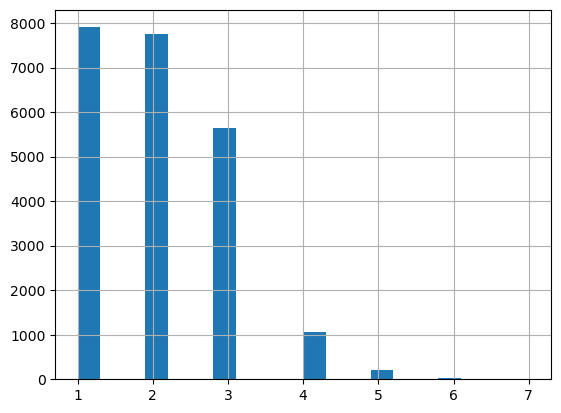

In [48]:
data['rooms'].hist(bins=20)

**Наблюдения:** 
1. В среднем в квартире имеется 2 комнаты.
2. Максимальное количество комнат в квартире - 7, минимальное количество комнат - 1.
3. Больше всего квартир на продаже - однокомнатных.
4. Однокомнатных и двухкомнатных квартир почти одинаковое количество (7904 и 7747 соответственно).

***Исследование высоты потолков в квартире:***

In [49]:
data['ceiling_height'].describe()

count    22580.000000
mean         2.692913
std          0.198686
min          2.400000
25%          2.550000
50%          2.700000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

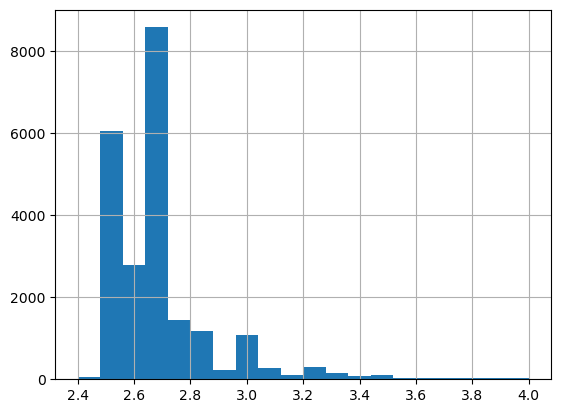

In [50]:
data['ceiling_height'].hist(bins=20)

**Наблюдения:** 
1. В среднем высота потолков составляет 2.7 метра.
2. Максимальная высота потолков - 4 метра, минимальная - 2.4 метра.
3. Больше всего квартир на продаже, у которых высота потолков составляет 2.7 метра.
4. Большая часть квартир на рынке недвижимости имеет высоту потолков от 2.5 метра до 2.7 метра.

***Исследование этажа квартиры:***

In [51]:
data['floor'].describe()

count    22580.000000
mean         5.871125
std          4.836331
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

<AxesSubplot:>

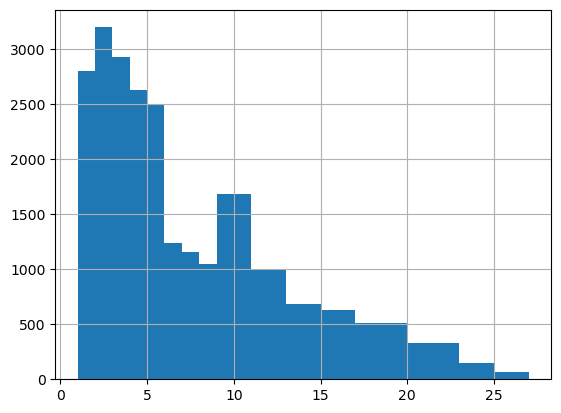

In [52]:
data['floor'].hist(bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 15, 17, 20, 23, 25, 27])

**Наблюдения:** 
1. Максимальный этаж квартиры - 27, минимальный этаж - первый.
2. В среднем квартира находится на пятом или шестом этаже.
3. Больше всего квартир на рынке, которые находятся на втором этаже.
4. Большая часть квартир на рынке находится между первым и шестом этажом.
5. Квартир, которые находятся на 9 и 10 этаже, составляют большую часть рынка, чем квартиры на 6, 7 и 8 этаже (по отдельности).

***Исследование типа этажа квартиры:***

In [53]:
data['type_of_floor'].describe()

count      22580
unique         3
top       другой
freq       16649
Name: type_of_floor, dtype: object

<AxesSubplot:>

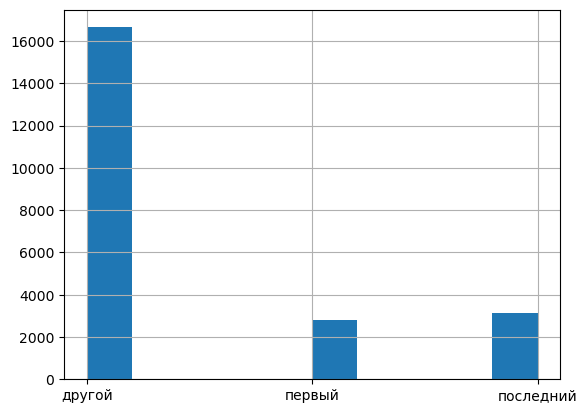

In [54]:
data['type_of_floor'].hist()

**Наблюдения:** 
1. Больше всего квартир с типом этажа "другой".
2. Квартир, которые находятся на последнем этаже, на рынке больше, чем квартир на первом этаже.

***Исследование общего количества этажей в доме:***

In [55]:
data['floors_total'].describe()

count    22580.000000
mean        10.691364
std          6.503125
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         27.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

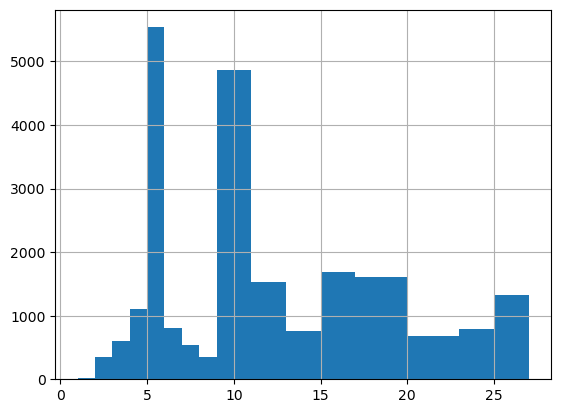

In [56]:
data['floors_total'].hist(bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 15, 17, 20, 23, 25, 27])

**Наблюдения:** 
1. В среднем на рынке недвижимости размещены объявления о квартирах в домах с десятью этажами.
2. В самом высоком доме расположено 27 этажей, в самом низком - один. Можно предположить, что на рынке есть объявления о продаже квартиры в частном доме.
3. На рынке недвижимости чаще всего встречаются дома с пятью этажами. Дома с девятью и десятью этажами так же составляют значительную часть рынка, как и пятиэтажные.

***Исследование расстояния до центра города (в метрах):***

In [57]:
data['cityCenters_nearest'].describe()

count    17441.00000
mean     14440.86850
std       8612.68044
min        208.00000
25%       9661.00000
50%      13220.00000
75%      16408.00000
max      65968.00000
Name: cityCenters_nearest, dtype: float64

Проверим максимальную отдаленность квартиры от центра города:

In [58]:
data[data['cityCenters_nearest'] == 65968] # От посёлка Молодёжное до центра Санкт-Петербурга

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_metre,day_of_exposition,month_of_exposition,year_of_exposition,type_of_floor,city_center_in_km
9640,8,4200000,51.4,2014-12-10,2,2.55,5,31.0,2,False,False,False,6.0,1,Молодёжное,84869.0,65968.0,0,NaN,0,NaN,1194,81712.062257,среда,12,2014,другой,66.0


In [59]:
data['airports_nearest'].isna().sum() # Проверим количество пропусков в данных

5139

<AxesSubplot:>

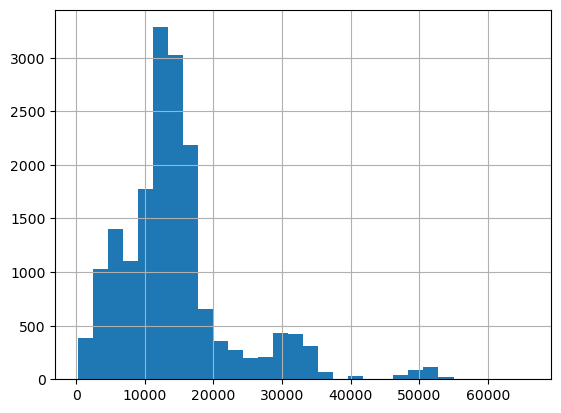

In [60]:
data['cityCenters_nearest'].hist(bins=30)

**Наблюдения:** 
1. В среднем квартира находится в 14440 метрах от центра города.
2. Максимальная удаленность от центра города - 65968 метров, минимальная - 208 метров.
3. Рынок недвижимости по большей части насыщён квартирами, которые находятся на расстоянии от 10000 до 18000 метров.
4. В данных имеется 5139 пропусков. Это 18-20% от общего количества. Такие данные не были заполнены на момент преобработки данных, так как отсутствуют данные расстояния до центра города для всех квартир в населенном пункте. Можно предположить, что это технический сбой.

***Исследование расстояния до ближайшего аэропорта:***

In [61]:
data['airports_nearest'].describe()

count    17441.000000
mean     28961.778510
std      12778.735385
min          0.000000
25%      18487.000000
50%      26941.000000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [62]:
data[data['airports_nearest'] != 0]['airports_nearest'].min() # Вручную уберем аномальное значение (0 метров от ближайшего аэропорта), чтобы не потерять 20% данных

6450.0

<AxesSubplot:>

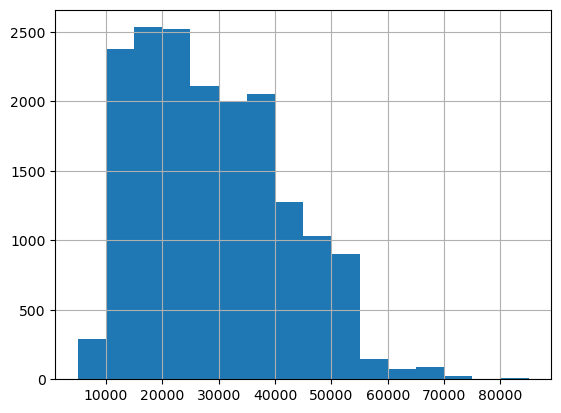

In [63]:
data['airports_nearest'].hist(bins=[5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000])

**Наблюдения:** 
1. В среднем расстояние до аэропорта составляет 28962 метра.
2. Максимальная удаленность от ближайшего аэропорта составляет 84869 метров. Минимальная удаленность составляет 6450 метров.
3. Больше всего на рынке квартир, которые находятся на расстоянии 15000-20000 метров до ближайшего аэропорта.
4. В основном рынок состоит из квартир, у которых удаленность от аэропорта составляет от 10000 до 50000 метров.
5. В данных имеется 5139 пропусков. Такие данные не были исправлены, так как отсутствует информация о расстоянии до аэропорта для всех квартир в населенном пункте. Следует обратиться к разработчикам, чтобы узнать причину появления пропусков в картографических данных для целого населенного пункта.

***Исследование расстояния до ближайшего парка:***

В столбце ```parks_nearest``` обнаружены 14964 пропуска в данных. Процент пропусков - 66% от общего количества данных. Чтобы разобраться, нужно обратиться к специалисту, который загружал в исходный датасет картографические данные.

Рассмотрим имеющиеся данные о расстоянии до ближайшего парка:

In [64]:
data['parks_nearest'].describe()

count    7616.000000
mean      492.143514
std       342.101786
min         1.000000
25%       288.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

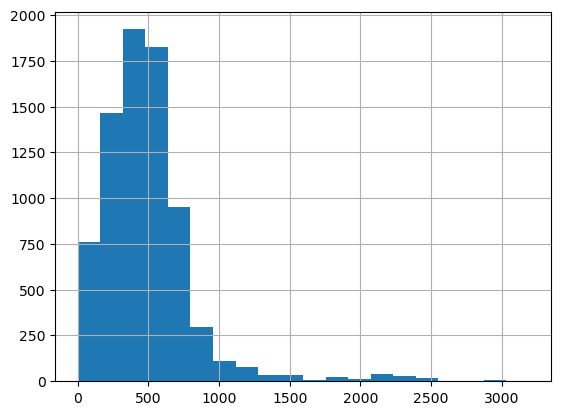

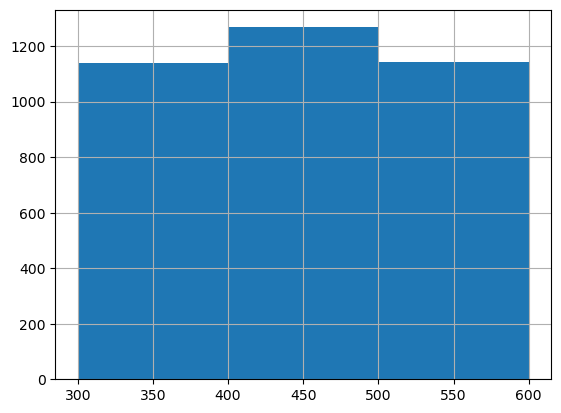

In [65]:
data['parks_nearest'].hist(bins=20)
plt.show()
data['parks_nearest'].hist(bins=[300, 400, 500, 600])
plt.show()

**Наблюдения:** 
1. В среднем расстояние до ближайшего парка составляет 492 метра.
2. Максимальная удаленность от парка составляет 3190 метров, минимальная - 1 метр (дом находится рядом с парком).
3. Больше всего квартир находится на расстоянии от 300 до 700 метров до ближайшего парка.
4. Наиболее частая отдаленность от парка - 400-500 метров.

***Исследование дня и месяца объявления:***

count       22580
unique          7
top       четверг
freq         4065
Name: day_of_exposition, dtype: object


<AxesSubplot:>

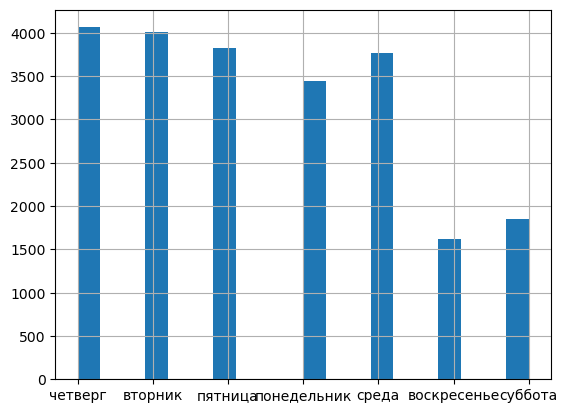

In [66]:
print(data['day_of_exposition'].describe())
data['day_of_exposition'].hist(bins=20)

<AxesSubplot:>

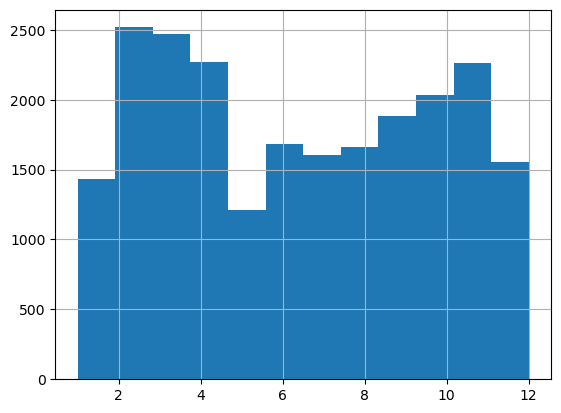

In [67]:
data['month_of_exposition'].hist(bins=12)

**Наблюдения:** 
1. Чаще всего объявления размещали в четверг. Реже всего размещали в воскресенье.
2. В большинстве случаев объявления размещали в будние дни.
3. В феврале было размещено больше всего объявлений. Меньше всего объявлений было размещено в мае.

##### Изучение, как быстро продавались квартиры:

Построение гистограммы:

<AxesSubplot:>

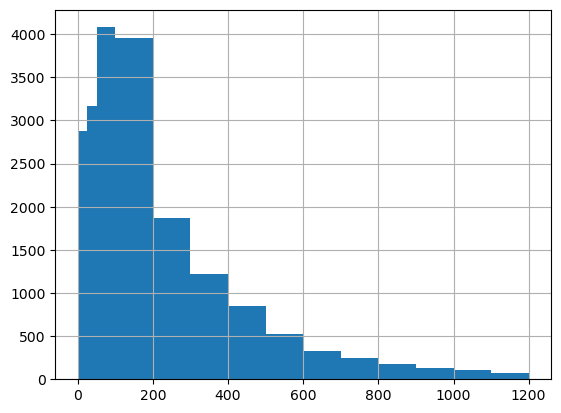

In [68]:
data['days_exposition'].hist(bins=[0, 1, 25, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])

Гистограмма показывает, что в среднем покупка квартиры происходит через 25-100 дней после публикации объявления. Объявлений, которые снимали через 1 день больше, чем объявлений, которые остаются актуальными, однако неизвестна причина снятия квартиры. Можно предположить, чтобы продавец снимал объявление, чтобы исправить некоторые детали.

Вычисление медианы и среднего значения:

In [69]:
print(data['days_exposition'].mean()) # среднее значение

print(data['days_exposition'].median()) # медиана

151.6014171833481
73.0


Определение быстрой и необычно долгой продажи:

In [70]:
print(data['days_exposition'].describe())

count    22580.000000
mean       151.601417
std        200.041595
min          0.000000
25%         23.000000
50%         73.000000
75%        195.000000
max       1200.000000
Name: days_exposition, dtype: float64


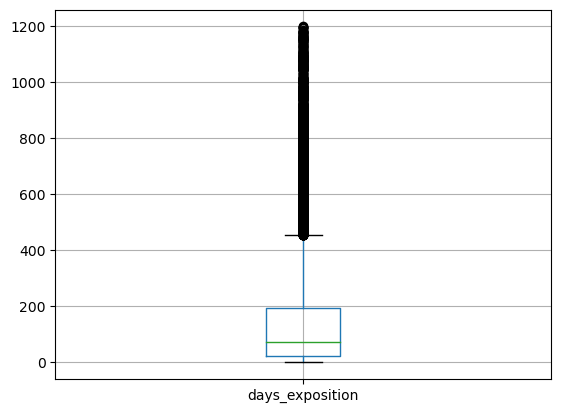

In [71]:
data.boxplot('days_exposition') # Построение диаграмы размаха
plt.show()

In [72]:
print(195+1.5*(195-23)) # нахождение границы правого "уса" диаграммы
print('Количество объявлений квартир, продажа которых происходила дольше 452 дней:', data[data['days_exposition'] >= 453]['total_area'].count())
print('Процент необычно долгих продаж от общего количества объявлений:', data[data['days_exposition'] >= 453]['total_area'].count()/22580)

453.0
Количество объявлений квартир, продажа которых происходила дольше 452 дней: 1909
Процент необычно долгих продаж от общего количества объявлений: 0.0845438441098317


**Выводы:**
1. Квартиры в целом продавались достаточно быстро. Обычно продажа занимает от 50 до 100 дней с момента публикации объявления.
2. Продажи можно считать быстрыми, если они происходят в течение первых 23 дней с момента публикации объявления. Первый квартиль означает, что четверть выборки данных не превышает 23 дней.
3. Необычно долгими можно считать продажи, которые происходят через 453 и более дней после публикации объявления. В среднем только 8.5% квартир продаются более 453 дней.

##### Факторы, влияющие на общую стоимость объекта:

Проверим, как влияет общая площадь квартиры на общую стоимость:

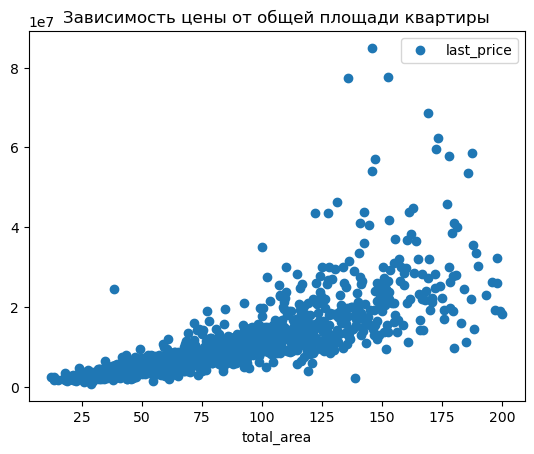

In [73]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(y='last_price', style='o', title='Зависимость цены от общей площади квартиры')
)
plt.show()

In [74]:
data['total_area'].corr(data['last_price'])

0.7206341477007433

На графике можно наблюдать, что зависимость есть. Коэффициент корреляции Пирсона стремится к единице, значит чем больше общая площадь квартиры, тем выше стоимость объекта. Следует обратить внимание, что встречаются случаи, где стоимость квартиры гораздо больше, чем квартиры с близкой к ней общей площадью. Такие случаи могут быть, если квартиры различаются в классе (квартиры бизнес-класса будут оценены значительно выше, чем квартиры эконом-класса)

Проверим, как влияет жилая площадь квартиры на общую стоимость:

<AxesSubplot:title={'center':'Зависимость цены квартиры от жилой площади'}, xlabel='living_area'>

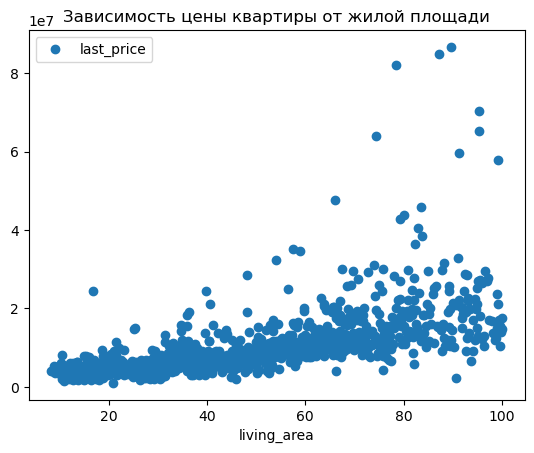

In [75]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(y='last_price', style='o', title='Зависимость цены квартиры от жилой площади')
)

In [76]:
data['living_area'].corr(data['last_price'])

0.5796261944706794

В данном случае зависимость меньше, чем от общей площади квартиры. Тут тоже встречаются индивидуальные случаи в цене на один жилой квадратный метр. Мы наблюдаем, что график не растет стремительно вверх, значит мы не можем говорить о том, что зависимость рассматриваемых параметров сильная.

Проверим, как влияет площадь кухни на общую стоимость квартиры:

<AxesSubplot:title={'center':'Зависимость цены квартиры от площади кухни'}, xlabel='kitchen_area'>

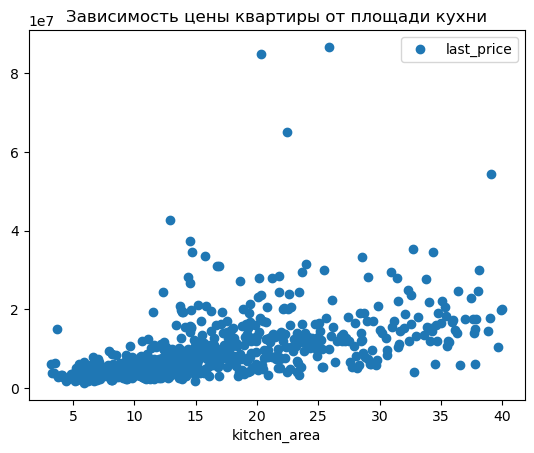

In [77]:
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(y='last_price', style='o', title='Зависимость цены квартиры от площади кухни')
)

In [78]:
data['kitchen_area'].corr(data['last_price'])

0.5010654929606849

Небольшая зависимость наблюдается, однако график очень волатилен, поэтому мы не можем четко утверждать о прямой зависимости двух параметров. Чем больше площадь кухни в квартире, тем более волатилен график, а значит цена квартиры может быть установлена по желанию продавца.

Проверим, как влияет количество комнат на общую стоимость квартиры:

<AxesSubplot:title={'center':'График зависимости цены квартиры от количества комнат'}, xlabel='Количество комнат', ylabel='Цена квартиры (руб.)'>

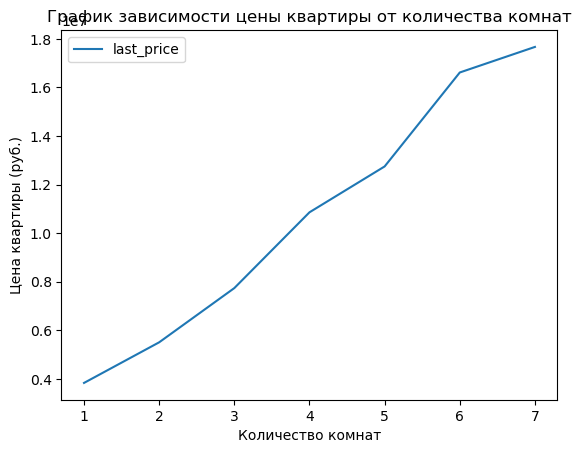

In [79]:
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(title='График зависимости цены квартиры от количества комнат',
    xlabel='Количество комнат', ylabel='Цена квартиры (руб.)')
)

На этом графике четко показано, что между количеством комнат и общей стоимостью квартиры существует прямая зависимость. Чем больше комнат в квартире, тем выше ее стоимость.

Проверим, как влияет тип этажа квартиры на общую стоимость:

<AxesSubplot:title={'center':'График зависимости цены от типа этажа квартиры'}, xlabel='Тип этажа (первый, другой, последний)', ylabel='Цена квартиры (руб.)'>

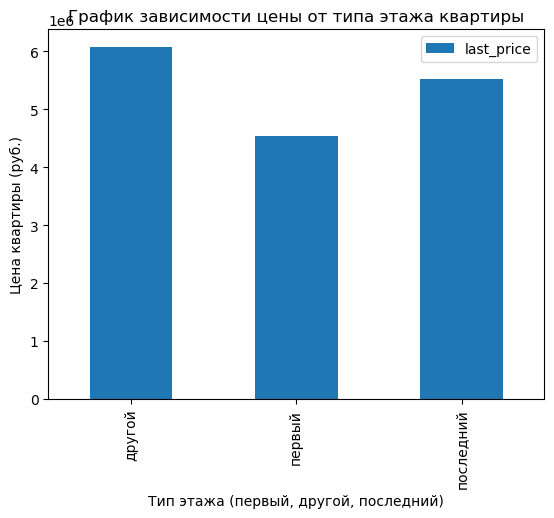

In [80]:
(
    data.pivot_table(index='type_of_floor', values='last_price')
    .plot(kind='bar', title='График зависимости цены от типа этажа квартиры',
    xlabel='Тип этажа (первый, другой, последний)', ylabel='Цена квартиры (руб.)')
)

Зависимость прослеживается. Квартиры на первом этаже в среднем стоят меньше, чем на любом другом этаже. Квартиры на последнем этаже составляют конкуренцию по стоимости квартирам, которые находятся на всех этажах, кроме первого и последнего. Можно сделать вывод, что этаж влияет на общую стоимость квартиры.

Проверим зависимость общей стоимости квартиры от даты размещения (день, неделя, месяц, год):

Зависимость общей стоимости квартиры от дня размещения:

In [81]:
data['week_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).week

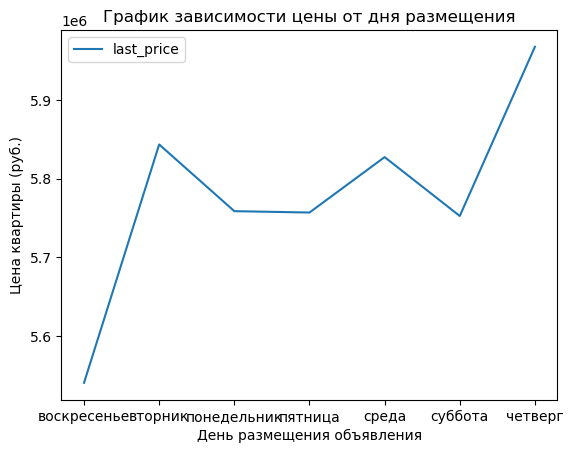

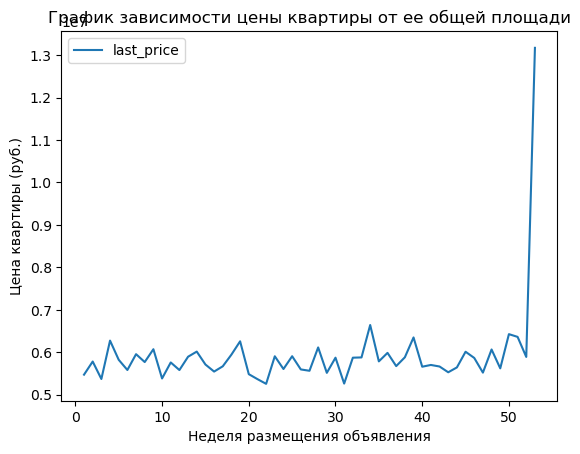

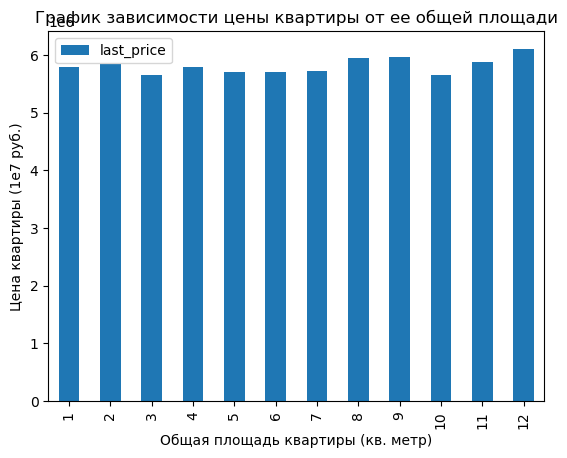

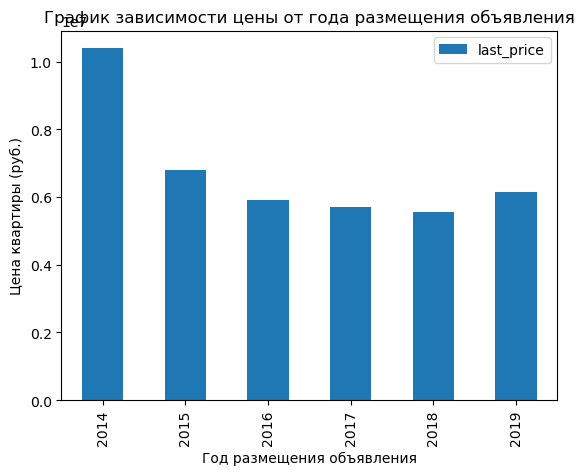

In [82]:
(
    data.pivot_table(index='day_of_exposition', values='last_price')
    .plot(title='График зависимости цены от дня размещения',
    xlabel='День размещения объявления', ylabel='Цена квартиры (руб.)')
)
plt.show()

(
    data.pivot_table(index='week_of_exposition', values='last_price')
    .plot(title='График зависимости цены квартиры от ее общей площади',
    xlabel='Неделя размещения объявления', ylabel='Цена квартиры (руб.)')
)
plt.show()

(
    data.pivot_table(index='month_of_exposition', values='last_price')
    .plot(kind='bar', title='График зависимости цены квартиры от ее общей площади',
    xlabel='Общая площадь квартиры (кв. метр)', ylabel='Цена квартиры (1е7 руб.)')
)
plt.show()

(
    data.pivot_table(index='year_of_exposition', values='last_price')
    .plot(kind='bar', title='График зависимости цены от года размещения объявления',
    xlabel='Год размещения объявления', ylabel='Цена квартиры (руб.)')
)
plt.show()

In [83]:
data[data['week_of_exposition'] == 53] # Проверим аномальную неделю на графике

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_metre,day_of_exposition,month_of_exposition,year_of_exposition,type_of_floor,city_center_in_km,week_of_exposition
3015,6,8484786,60.0,2015-12-30,2,2.70,18,30.5,17,False,False,False,9.1,0,Санкт-Петербург,17313.0,7963.0,0,NaN,0,NaN,666,141413.100000,среда,12,2015,другой,8.0,53
6837,12,4100000,44.0,2015-12-29,2,2.55,9,27.0,9,False,False,False,7.0,1,Санкт-Петербург,27359.0,12226.0,0,NaN,0,NaN,457,93181.818182,вторник,12,2015,последний,12.0,53
7409,3,14950000,122.2,2015-12-28,2,2.90,9,67.1,2,False,False,False,25.6,2,Санкт-Петербург,24796.0,3371.0,3,528.0,2,383.0,948,122340.425532,понедельник,12,2015,другой,3.0,53
9375,7,5000000,60.0,2015-12-31,3,2.70,9,38.1,5,False,False,False,7.2,0,Санкт-Петербург,50898.0,14963.0,0,NaN,0,NaN,194,83333.333333,четверг,12,2015,другой,15.0,53
11835,20,36500000,164.2,2015-12-31,5,3.35,6,82.2,6,False,False,False,21.8,1,Санкт-Петербург,20375.0,2209.0,2,207.0,3,225.0,250,222289.890378,четверг,12,2015,последний,2.0,53
13047,3,3700000,33.0,2015-12-28,1,2.70,26,16.0,15,False,False,False,7.0,1,Санкт-Петербург,15266.0,13171.0,0,NaN,1,1068.0,197,112121.212121,понедельник,12,2015,другой,13.0,53
13685,20,55845000,124.1,2015-12-28,2,2.70,9,50.0,2,False,False,False,20.0,0,Санкт-Петербург,21946.0,2242.0,1,679.0,1,227.0,378,450000.000000,понедельник,12,2015,другой,2.0,53
13761,5,1450000,31.0,2015-12-31,1,2.58,5,17.0,2,False,False,False,6.0,0,Волхов,NaN,NaN,0,NaN,0,NaN,320,46774.193548,четверг,12,2015,другой,NaN,53
19347,13,6999000,54.7,2015-12-29,2,2.70,11,30.5,7,False,False,False,10.7,2,Санкт-Петербург,43479.0,11261.0,0,NaN,0,NaN,649,127952.468007,вторник,12,2015,другой,11.0,53
21670,9,3650000,50.0,2015-12-28,2,2.50,6,29.0,6,False,False,False,9.4,1,Шушары,18288.0,29539.0,0,NaN,1,884.0,740,73000.000000,понедельник,12,2015,последний,30.0,53


Зависимости общей стоимости квартиры от дня размещения объявления нет. Продавцы сами решают, в какой день выложить объявление, поэтому нецелесообразно искать зависимость цены от даты размещения.

На графике зависимости цены квартиры от недели размещения можно заметить, что в последние дни года существует тенденция размещать объявление квартир по значительно большой стоимости. Никакой прямой зависимости нет, однако следует учитывать такой фактор для тех, кто хочет посмотреть квартиры подороже. Вероятно, подоходящих объявлений будет больше в канун Нового года.

**Выводы:**
1. Больше всего влияют на общую стоимость квартиры такие факторы, как количество комнат, тип этажа квартиры.
2. Меньше всего влияет на стоимость дата размещения (день, неделя, месяц, год).
3. Есть зависимость общей стоимости от площади кухни, общей и жилой площади квартиры.

##### Средняя цена квадратного метра в десяти населенных пунктах:

In [84]:
top_cities = data.pivot_table(index='locality_name', values=('last_price', 'price_per_square_metre'), aggfunc=('median', 'count'))
top_cities.columns=['last_price', 'price_per_square_metre', 'count_last_price', 'count_price_per_square_metre']
top_cities.sort_values(by='count_last_price', ascending=False).head(10)

,last_price,price_per_square_metre,count_last_price,count_price_per_square_metre
locality_name,,,,
Санкт-Петербург,14910,5450000.0,14910,104188.502764
Мурино,552,3490000.0,552,85145.665323
Кудрово,447,3950000.0,447,95185.185185
Шушары,434,3970000.0,434,76747.967480
Всеволожск,389,3500000.0,389,65789.473684
Пушкин,355,5150000.0,355,99706.744868
Колпино,337,3600000.0,337,74722.222222
Парголово,315,4100000.0,315,91642.857143
Гатчина,306,3095000.0,306,67860.569236


**Вывод:** На основе данных можно отметить, что населенными пунктами с самой низкой стоимостью квадратного метра являются Выборг, Всеволжск и Гатчина. Населенные пункты с самой высокой стоимостью квадратного метра - Санкт-Петербург, Пушкин и Кудрово.

Населенный пункт с самой дорогой ценой за квадратный метр - Санкт-Петербург, с самой низкой ценой за квадратный метр - Выборг.

##### Зависимость стоимости квартиры от расстояния до центра города:

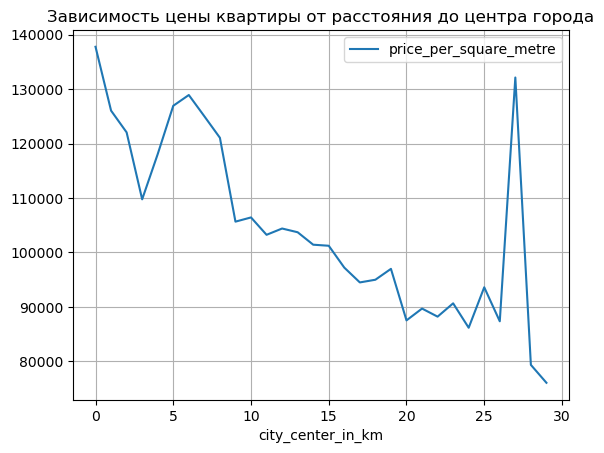

In [85]:
data.query('locality_name == "Санкт-Петербург"')\
    .pivot_table(index='city_center_in_km', values='price_per_square_metre', aggfunc='median')\
    .plot(grid = True, title = 'Зависимость цены квартиры от расстояния до центра города');

**Вывод:** средняя стоимость одного квадратного метра больше, если квартира находится ближе к центру. Важно отметить, что есть район с высокой стоимостью квадратного метра в 27 километрах от центра города. 

**Вывод к исследованию:** На этом этапе были изучены параметры объектов. Также было изучено, как быстро продавались квартиры, продемонстрирована зависимость общей стоимости от различного рода факторов, была посчитана средняя стоимость одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений и определена зависимость стоимости квартиры от расстояния до центра города.

### Общий вывод

В процессе работы над проектом были изучены исходные данные из архива объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах. На этапе предобработки были исправлены пропуски в данных, отслежены аномалии в данных. Для того, чтобы провести исследование, необходимо было добавить новые столбцы с информацией о цене квадратного метра, о дате публикации объявления, о типе этажа квартиры и расстоянии до центра города в километрах.

В исследовании была отслежена зависимость общей стоимости квартиры от различного рода факторов (параметры квартиры, инфраструктура города, инфраструктура района) для того, чтобы точно определять изменчивость цены при изменении параметров, влияющих на ценообразование. Также были изучены средние показатели стоимости одного квадратного метра объекта среди десяти населенных пунктов с наибольшим количеством объявлений. Для Санкт-Петербурга была выявлена зависимость цены одного квадратного метра от расстояния до центра города. Расчеты были сделаны для того, чтобы отследить различного рода аномалии на рынке недвижимости и минимизировать появление мошеннической деятельности.

**Рекомендации:**

В исследовании возникли трудности с пользовательскими данными. Для того, чтобы иметь корректное представление о рынке недвижимости и проводить качественные исследования, необходимо запрашивать всю информацию об имуществе у пользователя сервиса. Таким образом, удастся избежать большого количества пропусков в данных.

В исследовании также возникли трудности с картографическими данными. Желательно проверить систему, которая выгружает эти данные во избежания возникновения пропусков в большом объеме, не позволяющих провести более точный исследовательский анализ имеющихся данных о рынке недвижимости.